#Author Info
1) Name : Aman kag

2) Deakin ID : 222476542

#Importing Necessary Libraries

In [2]:
#Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Data Loading

In [3]:
#Here we are first loading the dataset into our Python environment
Path_For_Our_dataset = '/content/drive/MyDrive/Project 2/diabetes_prediction_dataset.csv'
HistoricDiabetes_Dataset = pd.read_csv(Path_For_Our_dataset)


# Pre-analysis / Data preprocessing

In [4]:
# Here we view the first few rows of the dataset
print(HistoricDiabetes_Dataset.head())

   gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0  


In [5]:
# Filter the dataset to include only individuals aged 55 and above
AmanAnalysis_elderlydata = HistoricDiabetes_Dataset[HistoricDiabetes_Dataset['age'] >= 55]

# Save the new dataset to a CSV file, if desired
AmanAnalysis_elderlydata.to_csv('AmanAnalysis_elderlydata.csv', index=False)

# To view the first few rows of the new dataset
print(AmanAnalysis_elderlydata.head())

    gender   age  hypertension  heart_disease smoking_history    bmi  \
0   Female  80.0             0              1           never  25.19   
4     Male  76.0             1              1         current  20.14   
7   Female  79.0             0              0         No Info  23.86   
12  Female  78.0             0              0          former  36.05   
13  Female  67.0             0              0           never  25.69   

    HbA1c_level  blood_glucose_level  diabetes  
0           6.6                  140         0  
4           4.8                  155         0  
7           5.7                   85         0  
12          5.0                  130         0  
13          5.8                  200         0  


# Data cleaning

In [6]:
# Handling null values -
# Check for null values in each column
ViewNullCounts = AmanAnalysis_elderlydata.isnull().sum()
print("Null Values in Each Column:")
print(ViewNullCounts)


Null Values in Each Column:
gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


#Checking Typo mistakes in dataset

In [7]:
#Checking to find any other values in the columns
# Unique values in each column
print("\nUnique Values in Each Column:")
for column in AmanAnalysis_elderlydata.columns:
    unique_values = AmanAnalysis_elderlydata[column].unique()
    print(f"{column}: {unique_values}")

# Descriptive statistics for numeric columns ( to check if any negative are there)
numeric_columns = AmanAnalysis_elderlydata.select_dtypes(include=['number']).columns
descriptive_stats = AmanAnalysis_elderlydata[numeric_columns].describe()
print("\nDescriptive Statistics for Numeric Columns:")
print(descriptive_stats)


Unique Values in Each Column:
gender: ['Female' 'Male' 'Other']
age: [80. 76. 79. 78. 67. 69. 72. 73. 77. 66. 60. 57. 74. 59. 56. 55. 62. 68.
 75. 58. 61. 65. 70. 71. 64. 63.]
hypertension: [0 1]
heart_disease: [1 0]
smoking_history: ['never' 'current' 'No Info' 'former' 'not current' 'ever']
bmi: [25.19 20.14 23.86 ... 44.39 17.83 60.52]
HbA1c_level: [6.6 4.8 5.7 5.  5.8 6.5 9.  3.5 4.  6.1 8.8 6.  8.2 7.5 6.2 6.8 7.  4.5]
blood_glucose_level: [140 155  85 130 200 160 126 159 100 158 145 300 280  80  90 220 260 240]
diabetes: [0 1]

Descriptive Statistics for Numeric Columns:
                age  hypertension  heart_disease           bmi   HbA1c_level  \
count  32262.000000  32262.000000   32262.000000  32262.000000  32262.000000   
mean      67.677825      0.162544       0.105604     28.808840      5.680826   
std        8.499511      0.368955       0.307335      5.667032      1.159069   
min       55.000000      0.000000       0.000000     10.010000      3.500000   
25%       60.00

In [8]:
# Check data types of every column
checkingDataTypes = AmanAnalysis_elderlydata.dtypes
print("Data Types of Columns:")
print(checkingDataTypes)

Data Types of Columns:
gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object


In [9]:
# Check the total number of records in the filtered dataset
check_total_records = AmanAnalysis_elderlydata.shape[0]
print(f"Total number of records for individuals aged 55 and above: {check_total_records}")

Total number of records for individuals aged 55 and above: 32262


#Checking outliers in dataset

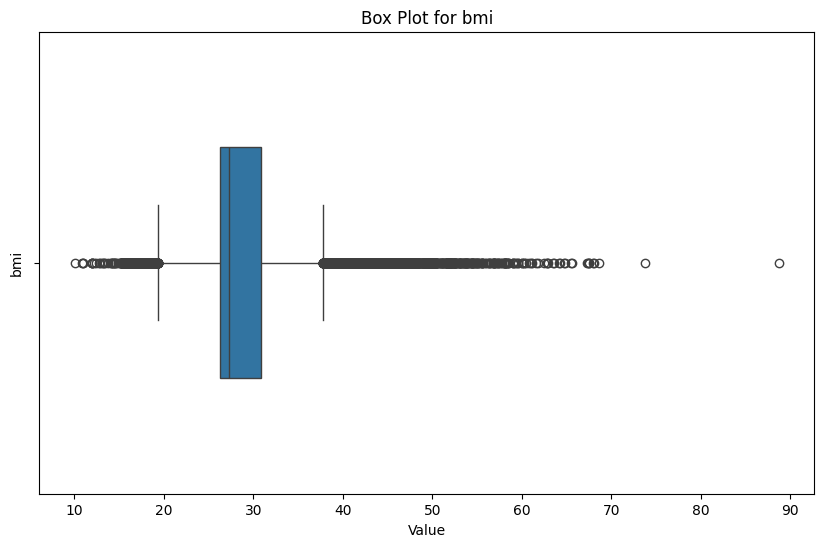

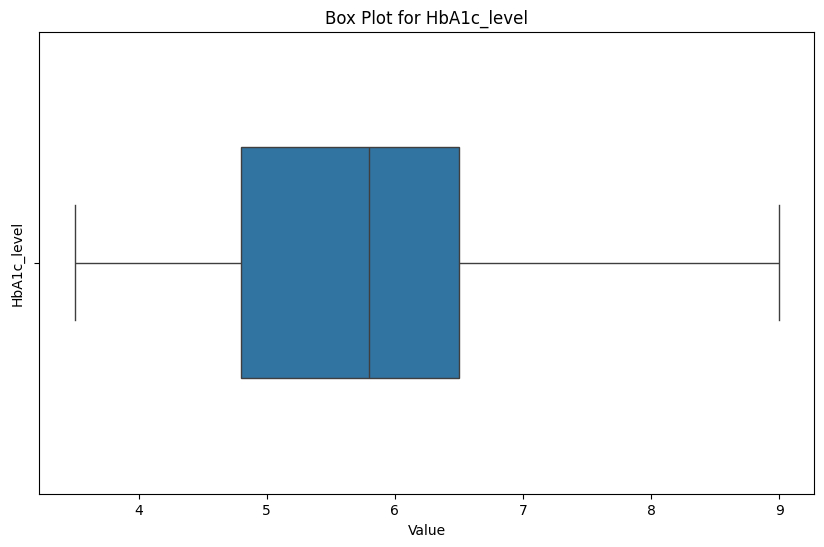

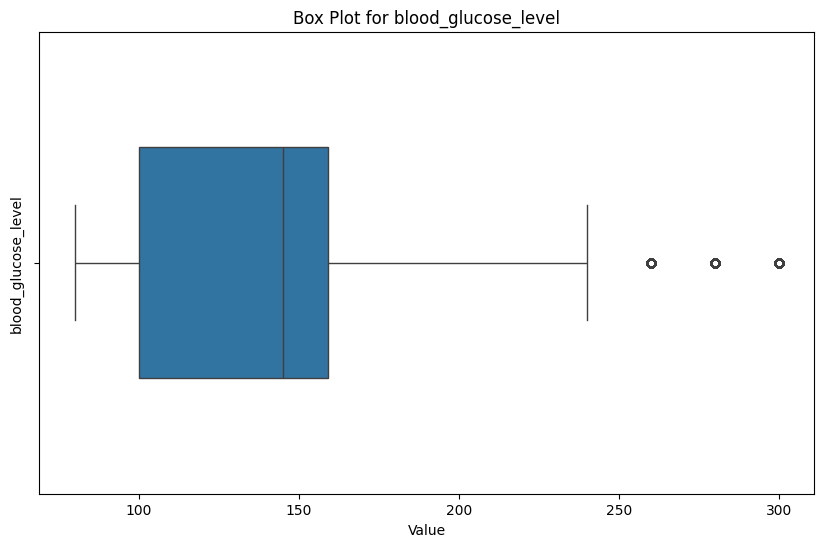

In [10]:
# Using box plot which is used for outlier detection

# Features to plot
features = ['bmi', 'HbA1c_level', 'blood_glucose_level']

# Create a box plot for each feature
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=AmanAnalysis_elderlydata, x=feature, whis=1.5, width=0.5)
    plt.title(f'Box Plot for {feature}')
    plt.xlabel('Value')
    plt.ylabel(feature)
    plt.show()


In [11]:
# Features to check for outliers
features_to_check = ['bmi', 'HbA1c_level', 'blood_glucose_level']

# Dictionary to hold outliers for each feature
outliers_dict = {}

# Function to find outliers using the IQR method
def find_outliers(data, feature):
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)]
    return outliers

# Finding and storing outliers for each feature
for feature in features_to_check:
    outliers_dict[feature] = find_outliers(AmanAnalysis_elderlydata, feature)

# Printing out the outliers for each feature
for feature, outliers in outliers_dict.items():
    print(f"Outliers for {feature}:")
    print(outliers)
    print("\n")


Outliers for bmi:
       gender   age  hypertension  heart_disease smoking_history    bmi  \
47     Female  60.0             0              0           never  18.03   
59     Female  67.0             0              0           never  63.48   
103    Female  55.0             0              0            ever  18.60   
140    Female  80.0             1              0           never  44.06   
169    Female  61.0             0              0     not current  39.36   
...       ...   ...           ...            ...             ...    ...   
99892  Female  67.0             0              0         No Info  44.39   
99901  Female  72.0             0              0         current  17.83   
99948  Female  56.0             1              0          former  39.62   
99953  Female  59.0             1              0            ever  60.52   
99962  Female  58.0             1              0           never  38.31   

       HbA1c_level  blood_glucose_level  diabetes  
47             4.0           

As there were so many outliers and it is medical dataset, we can't eliminate that many records, so we will check for extreme outliers.
Here in the next code I have checked the outliers which are 4 times far away from normal interquantile range and could be potentially called extreme outliers.

In [12]:
def extreme_outliers(df, feature, multiplier=4):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - multiplier * IQR
    upper_bound = Q3 + multiplier * IQR
    return df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]

features_to_check = ['bmi', 'blood_glucose_level']

# Define the multiplier outside the function to use in the print statement
multiplier = 4

for feature in features_to_check:
    outliers = extreme_outliers(AmanAnalysis_elderlydata, feature, multiplier)
    print(f"Extreme outliers for {feature} (using multiplier {multiplier}):")
    print(outliers[[feature]])

Extreme outliers for bmi (using multiplier 4):
         bmi
59     63.48
618    60.26
1395   60.20
1862   51.61
2059   52.67
...      ...
98706  54.59
99579  57.78
99650  52.97
99793  50.85
99953  60.52

[256 rows x 1 columns]
Extreme outliers for blood_glucose_level (using multiplier 4):
Empty DataFrame
Columns: [blood_glucose_level]
Index: []


In [13]:
#Checking the full row of the outlier , all the features (viewing starting 10 values)
for feature in features_to_check:
    outliers = extreme_outliers(AmanAnalysis_elderlydata, feature, multiplier)
    print(f"Extreme outliers for {feature} (using multiplier {multiplier}):")
    print(outliers.head(10))  # Print the first 10 rows of extreme outliers for each feature

Extreme outliers for bmi (using multiplier 4):
      gender   age  hypertension  heart_disease smoking_history    bmi  \
59    Female  67.0             0              0           never  63.48   
618   Female  59.0             0              1           never  60.26   
1395  Female  60.0             1              0         current  60.20   
1862  Female  63.0             0              0           never  51.61   
2059  Female  58.0             0              0          former  52.67   
2113  Female  59.0             0              0            ever  59.03   
2237  Female  80.0             0              0         No Info  50.77   
3007    Male  63.0             0              0          former  50.30   
3229  Female  67.0             0              1         No Info  68.10   
3277  Female  69.0             0              0           never  57.79   

      HbA1c_level  blood_glucose_level  diabetes  
59            8.8                  155         1  
618           8.8                  1

# Removing Extreme outlier -

In [14]:
def extreme_outliers(df, feature, multiplier=4):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - multiplier * IQR
    upper_bound = Q3 + multiplier * IQR
    return df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]  # Keeping only non-outliers

multiplier = 4

Cleaned_AmanAnalysis_elderlydata = AmanAnalysis_elderlydata.copy()  # Created a copy of the original data to preserve it

for feature in features_to_check:
    Cleaned_AmanAnalysis_elderlydata = extreme_outliers(Cleaned_AmanAnalysis_elderlydata, feature, multiplier)

# Here I am Displaying cleaned data
print("Cleaned Data:")
print(Cleaned_AmanAnalysis_elderlydata)

# Displaying total record count
total_records_cleaned = Cleaned_AmanAnalysis_elderlydata.shape[0]
print(f"\nTotal Records after removing extreme outliers: {total_records_cleaned}")


Cleaned Data:
       gender   age  hypertension  heart_disease smoking_history    bmi  \
0      Female  80.0             0              1           never  25.19   
4        Male  76.0             1              1         current  20.14   
7      Female  79.0             0              0         No Info  23.86   
12     Female  78.0             0              0          former  36.05   
13     Female  67.0             0              0           never  25.69   
...       ...   ...           ...            ...             ...    ...   
99984    Male  80.0             1              0         No Info  20.96   
99986  Female  63.0             0              0           never  29.01   
99995  Female  80.0             0              0         No Info  27.32   
99997    Male  66.0             0              0          former  27.83   
99999  Female  57.0             0              0         current  22.43   

       HbA1c_level  blood_glucose_level  diabetes  
0              6.6               

#Data Balancing

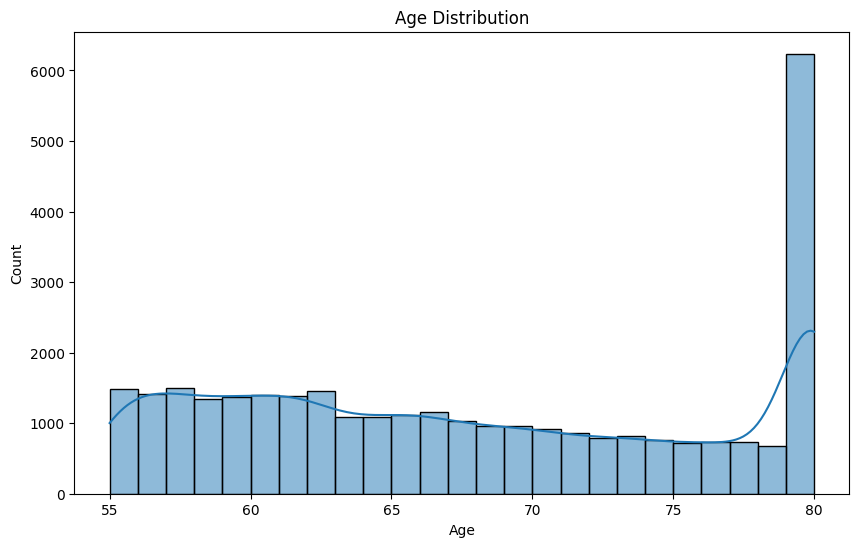

In [15]:
# Histogram for Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(Cleaned_AmanAnalysis_elderlydata['age'], kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


In [16]:
# Counting the number of records where age is equal to 80 in the elderly dataset
count_age_80_records = Cleaned_AmanAnalysis_elderlydata[Cleaned_AmanAnalysis_elderlydata['age'] == 80].shape[0]

count_age_80_records


5616

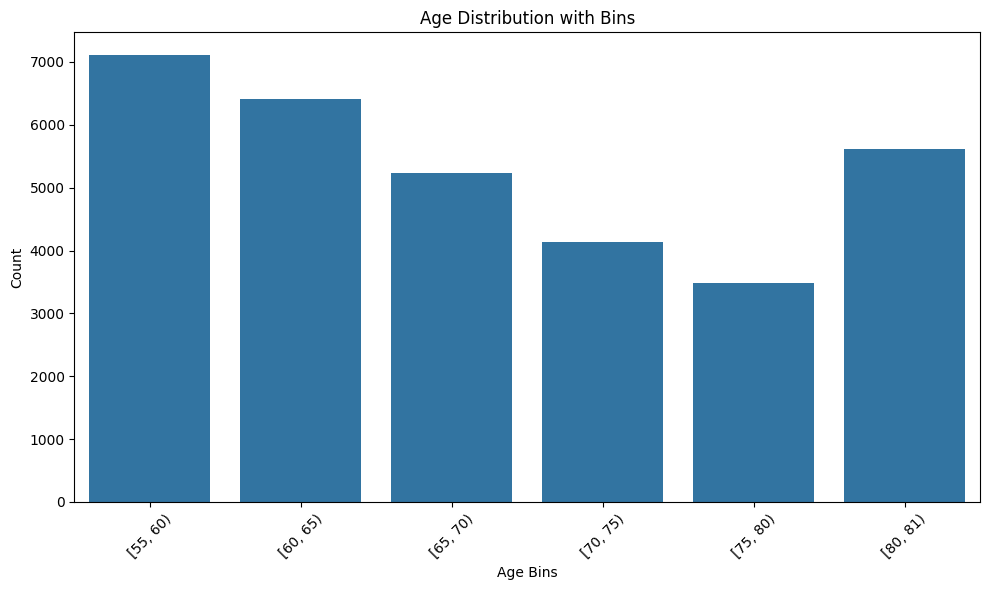

[55, 60)    7116
[60, 65)    6411
[65, 70)    5239
[70, 75)    4142
[75, 80)    3482
[80, 81)    5616
Name: age_bin, dtype: int64


In [17]:
# Define the age bins also I am making sure the last bin captures ages 80 and above
bins = [55, 60, 65, 70, 75, 80, 81]
bin_labels = [f"[{bins[i]}, {bins[i+1]})" for i in range(len(bins)-1)]

# Bin the age column in the cleaned dataset
Cleaned_AmanAnalysis_elderlydata['age_bin'] = pd.cut(Cleaned_AmanAnalysis_elderlydata['age'],
                                                      bins=bins,
                                                      labels=bin_labels,
                                                      right=False)

# Convert 'age_bin' to a categorical type with ordered categories
Cleaned_AmanAnalysis_elderlydata['age_bin'] = pd.Categorical(Cleaned_AmanAnalysis_elderlydata['age_bin'],
                                                             categories=bin_labels,
                                                             ordered=True)

# Plot the histogram for the binned age distribution
plt.figure(figsize=(10, 6))
# Extract the counts for each bin to ensure correct order
age_bin_counts = Cleaned_AmanAnalysis_elderlydata['age_bin'].value_counts().loc[bin_labels]
age_bin_counts = age_bin_counts.reindex(bin_labels, fill_value=0)  # Ensure all bins are present
sns.barplot(x=age_bin_counts.index, y=age_bin_counts.values)
plt.title('Age Distribution with Bins')
plt.xlabel('Age Bins')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()  # Also Adjusted layout to fit the x-axis labels
plt.show()

# Print the counts in each bin for reference
print(age_bin_counts)


#Again trying to change bin size to have better balanced dataset

In [18]:
# Display the first few rows of the DataFrame to check the 'age_bin' column
Cleaned_AmanAnalysis_elderlydata.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,age_bin
0,Female,80.0,0,1,never,25.19,6.6,140,0,"[80, 81)"
4,Male,76.0,1,1,current,20.14,4.8,155,0,"[75, 80)"
7,Female,79.0,0,0,No Info,23.86,5.7,85,0,"[75, 80)"
12,Female,78.0,0,0,former,36.05,5.0,130,0,"[75, 80)"
13,Female,67.0,0,0,never,25.69,5.8,200,0,"[65, 70)"


In [22]:
#Creating a trial dataset or copy of dataset to try to balnce using diffrent range of bins.
trial_data = Cleaned_AmanAnalysis_elderlydata.copy()

# Adjust the bins based on the new trial results
new_adjusted_bins = [55, 61, 68, 75, 81]
new_adjusted_bin_labels = [f"[{new_adjusted_bins[i]}, {new_adjusted_bins[i+1]})" for i in range(len(new_adjusted_bins)-1)]

# Applyed the new binning to the trial data
trial_data['new_adjusted_age_bin'] = pd.cut(trial_data['age'], bins=new_adjusted_bins, labels=new_adjusted_bin_labels, right=False)

# Convert 'new_adjusted_age_bin' to a categorical type with ordered categories
trial_data['new_adjusted_age_bin'] = pd.Categorical(trial_data['new_adjusted_age_bin'], categories=new_adjusted_bin_labels, ordered=True)

# Count the number of records in each new adjusted bin
new_adjusted_bin_counts = trial_data['new_adjusted_age_bin'].value_counts().sort_index()

# Output the new bin counts
new_adjusted_bin_counts


[55, 61)    8514
[61, 68)    8325
[68, 75)    6069
[75, 81)    9098
Name: new_adjusted_age_bin, dtype: int64

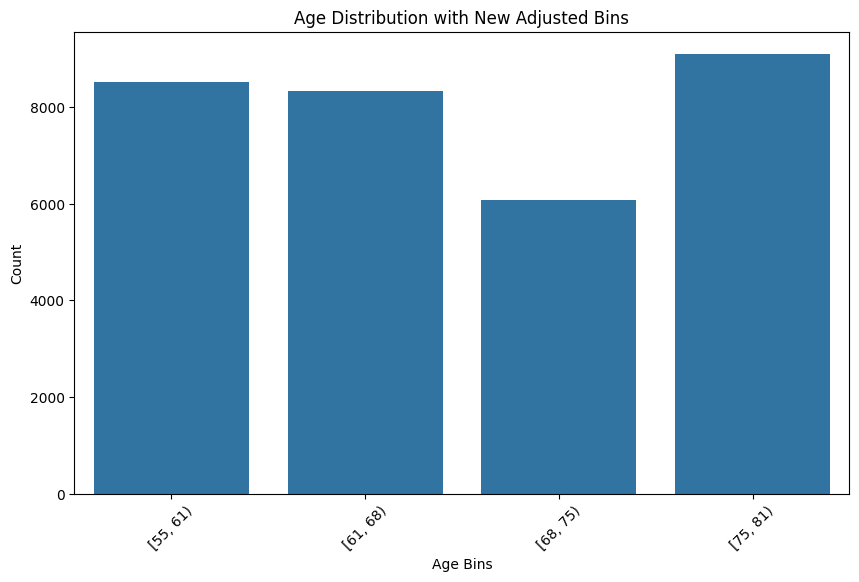

In [23]:
# Define the new adjusted bins
new_adjusted_bins = [55, 61, 68, 75, 81]
new_adjusted_bin_labels = [f"[{new_adjusted_bins[i]}, {new_adjusted_bins[i+1]})" for i in range(len(new_adjusted_bins)-1)]

# Apply the new binning to the main cleaned dataset
Cleaned_AmanAnalysis_elderlydata['new_adjusted_age_bin'] = pd.cut(Cleaned_AmanAnalysis_elderlydata['age'],
                                                                   bins=new_adjusted_bins,
                                                                   labels=new_adjusted_bin_labels,
                                                                   right=False)

# Convert 'new_adjusted_age_bin' to a categorical type with ordered categories
Cleaned_AmanAnalysis_elderlydata['new_adjusted_age_bin'] = pd.Categorical(Cleaned_AmanAnalysis_elderlydata['new_adjusted_age_bin'],
                                                                          categories=new_adjusted_bin_labels,
                                                                          ordered=True)

# Let's create a histogram based on the new adjusted age bins and counts
plt.figure(figsize=(10, 6))
sns.barplot(x=new_adjusted_bin_counts.index, y=new_adjusted_bin_counts.values)
plt.title('Age Distribution with New Adjusted Bins')
plt.xlabel('Age Bins')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()



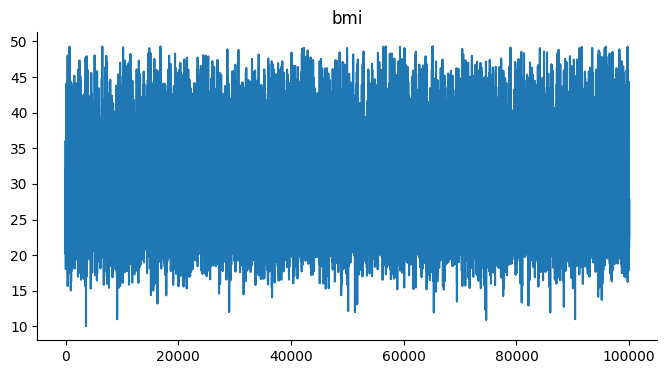

In [19]:
from matplotlib import pyplot as plt
Cleaned_AmanAnalysis_elderlydata['bmi'].plot(kind='line', figsize=(8, 4), title='bmi')
plt.gca().spines[['top', 'right']].set_visible(False)

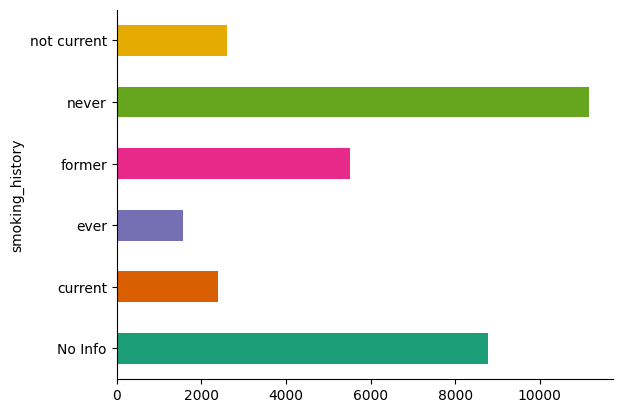

In [20]:
Cleaned_AmanAnalysis_elderlydata.groupby('smoking_history').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

# Renaming the column and finally downloading the preprocessed dataset

In [25]:
# Drop the 'age_bin' column
Cleaned_AmanAnalysis_elderlydata = Cleaned_AmanAnalysis_elderlydata.drop('age_bin', axis=1)

# Rename 'new_adjusted_age_bin' to 'age_range'
Cleaned_AmanAnalysis_elderlydata = Cleaned_AmanAnalysis_elderlydata.rename(columns={'new_adjusted_age_bin': 'age_range'})

In [27]:
# Save the final dataset to a new CSV file
final_csv_path = '/content/AmanAnalysis_Preprocessed_elderlydata.csv'
Cleaned_AmanAnalysis_elderlydata.to_csv(final_csv_path, index=False)

# Use the Google Colab 'files' module to download the CSV file to your local machine
from google.colab import files
files.download(final_csv_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>